In [1]:
%pip install networkx matplotlib
%pip install numpy
%pip install torch torchvision torch-geometric h5py pandas scikit-learn matplotlib


  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached networkx-3.5-py3-none-any.whl (2.0 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 72.0 MB/s  0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 64.1 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 12.8/12.8 MB 100.2 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 108.5 MB/s  0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/9 [pyparsing]
   ---- -

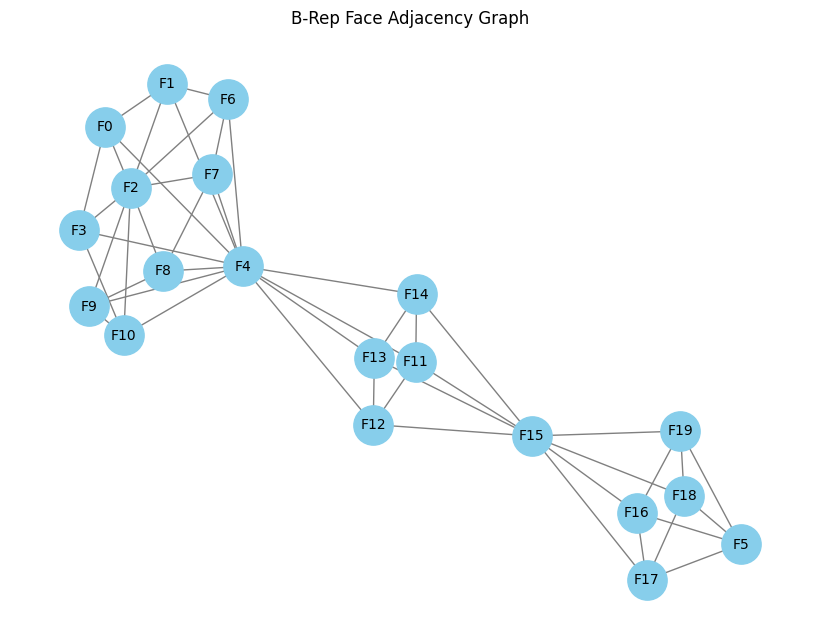

In [23]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt

# Load the .pkl file
with open('./my_model_graph1.pkl', 'rb') as f:
    data = pickle.load(f)

# Extract data
edge_index = data['edge_index']
face_features = data['face_features']
# edge_features = data['edge_features'] # This key also doesn't exist

# Create a graph from the edge_index
G = nx.Graph()
G.add_edges_from(edge_index.T) # Transpose edge_index to get a list of tuples

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Spring layout for nice spacing
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_color='skyblue', edge_color='gray', node_size=800, font_size=12)

# Optional: Add labels
labels = {i: f"F{i}" for i in G.nodes}
nx.draw_networkx_labels(G, pos, labels, font_size=10)

plt.title("B-Rep Face Adjacency Graph")
plt.axis('off')
plt.show()

In [19]:
import pickle

with open("my_model_graph.pkl", "rb") as f:
    data = pickle.load(f)



In [20]:
print("Keys in data:", data.keys())


Keys in data: dict_keys(['num_nodes', 'edge_index', 'face_features', 'brep_edge_features', 'proximity_A1_shortest_path', 'proximity_A2_spatial_relations'])


In [24]:
import pandas as pd

# Convert and display face features
if 'face_features' in data:
    face_df = pd.DataFrame(data['face_features'])
    print("Face Features:")
    display(face_df)

# Convert and display edge features
if 'brep_edge_features' in data:
    edge_df = pd.DataFrame(data['brep_edge_features'])
    print("Edge Features:")
    display(edge_df)


Face Features:


,type,area,adj,loops
0,0,1.697398e+07,4,1
1,1,3.322137e+06,4,1
2,0,1.391665e+07,8,1
3,1,3.322137e+06,4,1
4,0,6.408336e+06,12,2
5,0,4.884749e+06,4,1
6,0,1.278740e+07,4,1
7,1,3.322137e+06,4,1
8,0,1.697398e+07,4,1
9,1,3.322137e+06,4,1


Edge Features:


,len,conv
0,5064.797514,0
1,3351.364169,0
2,5064.797514,0
3,3351.364169,0
4,655.926847,0
5,5064.797514,0
6,655.926847,0
7,655.926847,0
8,2524.760000,0
9,655.926847,0


Proximity A1: Shortest Path Matrix (Face-to-Face):
[[0. 1. 1. 1. 1. 5. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [1. 0. 1. 2. 1. 5. 1. 2. 2. 2. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [1. 1. 0. 1. 2. 6. 1. 1. 1. 1. 1. 3. 3. 3. 3. 4. 5. 5. 5. 5.]
 [1. 2. 1. 0. 1. 5. 2. 2. 2. 2. 1. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [1. 1. 2. 1. 0. 4. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 3. 3. 3. 3.]
 [5. 5. 6. 5. 4. 0. 5. 5. 5. 5. 5. 3. 3. 3. 3. 2. 1. 1. 1. 1.]
 [2. 1. 1. 2. 1. 5. 0. 1. 2. 2. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [2. 2. 1. 2. 1. 5. 1. 0. 1. 2. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [2. 2. 1. 2. 1. 5. 2. 1. 0. 1. 2. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [2. 2. 1. 2. 1. 5. 2. 2. 1. 0. 1. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [2. 2. 1. 1. 1. 5. 2. 2. 2. 1. 0. 2. 2. 2. 2. 3. 4. 4. 4. 4.]
 [2. 2. 3. 2. 1. 3. 2. 2. 2. 2. 2. 0. 1. 2. 1. 1. 2. 2. 2. 2.]
 [2. 2. 3. 2. 1. 3. 2. 2. 2. 2. 2. 1. 0. 1. 2. 1. 2. 2. 2. 2.]
 [2. 2. 3. 2. 1. 3. 2. 2. 2. 2. 2. 2. 1. 0. 1. 1. 2. 2. 2. 2.]
 [2. 2. 3. 2. 1. 3. 2. 2. 2. 2. 2. 1. 2. 1. 0. 1. 2. 2. 2. 2.]
 [3.

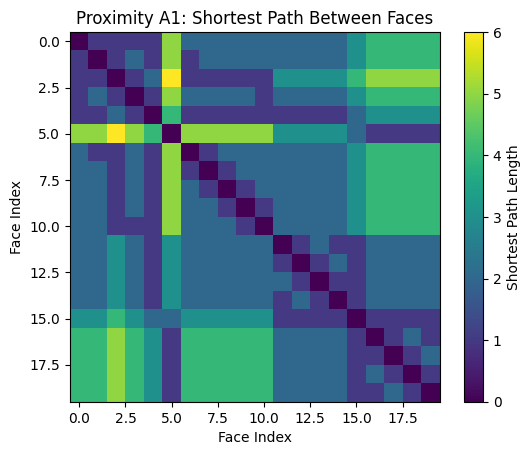

In [26]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# Load the graph data from the .pkl file
with open('my_model_graph1.pkl', 'rb') as f:
    data = pickle.load(f)

# Access A1 shortest path matrix
A1 = data['proximity_A1_shortest_path']

print("Proximity A1: Shortest Path Matrix (Face-to-Face):")
print(A1)

# Optional: Visualize it as a heatmap
plt.imshow(A1, cmap='viridis')
plt.colorbar(label='Shortest Path Length')
plt.title('Proximity A1: Shortest Path Between Faces')
plt.xlabel('Face Index')
plt.ylabel('Face Index')
plt.show()


In [2]:
# Install PyTorch (check for correct CUDA version if needed)
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

# Install PyTorch Geometric dependencies
%pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html
%pip install torch-geometric

# Optional: install visualization tools
%pip install networkx matplotlib


Looking in indexes: https://download.pytorch.org/whl/cpu
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.5 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.5 MB 1.3 MB/s eta 0:00:02
   ------------------------- -------------- 1.6/2.5 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 3.3 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.
Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyg_lib (from versions: none)
ERROR: No matching distribution found for pyg_lib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving my_model_graph.pkl to my_model_graph.pkl


In [9]:
print(data.keys())


dict_keys(['num_nodes', 'edge_index', 'face_features', 'brep_edge_features', 'proximity_A1_shortest_path', 'proximity_A2_spatial_relations'])


In [3]:
# !pip install --upgrade pip
%pip install torch==2.2.2+cu121 torchvision==0.17.2+cu121 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu121
%pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.2+cu121.html
%pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.2+cu121.html
%pip install torch-geometric
# Install PyTorch Geometric dependencies
%pip install torch_geometric torch-scatter torch-sparse torch-cluster torch-spline-conv -f https://data.pyg.org/whl/torch-2.0.0+cpu.html




Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.5 GB ? eta -:--:--
      --------------------------------------- 0.0/2.5 GB 252.3 MB/s eta 0:00:10
     - -------------------------------------- 0.1/2.5 GB 242.1 MB/s eta 0:00:10
     -- ------------------------------------- 0.1/2.5 GB 244.9 MB/s eta 0:00:10
     --- ------------------------------------ 0.2/2.5 GB 239.9 MB/s eta 0:00:10
     --- ------------------------------------ 0.2/2.5 GB 232.2 MB/s eta 0:00:10
     ---- ----------------------------------- 0.3/2.5 GB 223.4 MB/s eta 0:00:10
     ----- ---------------------------------- 0.3/2.5 GB 215.0 MB/s eta 0:00:10
     ----- ---------------------------------- 0.3/2.5 GB 204.3 MB/s eta 0:00:11
     ------ --------------------------------- 0.4/2.5 GB 197.2 MB/s eta 0:00:11
     ------ --------------------------------- 0.4/2.5 GB 182.1 MB/s eta 0:00:12
     ------ --------------------------------- 0.4/2.5 GB 169.3 MB/s et

  DEPRECATION: Building 'torch-cluster' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'torch-cluster'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [114 lines of output]
      
      A module that was compiled using NumPy 1.x cannot be run in
      NumPy 2.3.2 as it may crash. To support both 1.x and 2.x
      versions of NumPy, modules must be compiled with NumPy 2.0.
      Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.
      
      If you are a user of the module, the easiest solution will be to
      downgrade to 'numpy<2' or 

In [11]:
import torch
from torch_geometric.data import Data
import numpy as np

# Assuming face_features is a dictionary of numpy arrays as shown in the notebook state
face_features_dict = data['face_features']

# Convert the dictionary of numpy arrays to a single numpy array by stacking them column-wise
# Ensure all arrays have the same number of rows (nodes)
feature_arrays = [face_features_dict[key] for key in face_features_dict]
# Check if all arrays have the same number of rows
if all(arr.shape[0] == feature_arrays[0].shape[0] for arr in feature_arrays):
    face_features_np = np.stack(feature_arrays, axis=1)
else:
    raise ValueError("Feature arrays in 'face_features' have different numbers of rows.")

# Convert the combined numpy array to a torch tensor
x_tensor = torch.tensor(face_features_np, dtype=torch.float)

# Access edge index using the dictionary key and transpose
edge_index_tensor = torch.tensor(data['edge_index'], dtype=torch.long).T

graph_data = Data(
    x=x_tensor,  # node features
    edge_index=edge_index_tensor # edge index must be [2, num_edges]
)

print(graph_data)

Data(x=[8, 3], edge_index=[17, 2])


In [12]:
import torch.nn as nn

class FaceEmbeddingMLP(nn.Module):
    def __init__(self, in_dim=3, hidden_dim=32, out_dim=64):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.mlp(x)


In [13]:
import torch
from torch_geometric.data import Data
import numpy as np

# Recreate graph_data with original features
face_features_dict = data['face_features']
feature_arrays = [face_features_dict[key] for key in face_features_dict]
if all(arr.shape[0] == feature_arrays[0].shape[0] for arr in feature_arrays):
    face_features_np = np.stack(feature_arrays, axis=1)
else:
    raise ValueError("Feature arrays in 'face_features' have different numbers of rows.")
x_tensor = torch.tensor(face_features_np, dtype=torch.float)
# Access edge index using the dictionary key and DO NOT transpose
edge_index_tensor = torch.tensor(data['edge_index'], dtype=torch.long)

graph_data = Data(
    x=x_tensor,  # node features
    edge_index=edge_index_tensor # edge index must be [2, num_edges]
)

# Initialize the embedding layer with the correct input dimension
embedding_layer = FaceEmbeddingMLP(in_dim=graph_data.x.shape[1])
x_embedded = embedding_layer(graph_data.x)

# Optionally update graph_data.x with the embedded features
graph_data.x = x_embedded

print("Original graph_data.x shape:", x_tensor.shape)
print("Embedded graph_data.x shape:", x_embedded.shape)
print("graph_data.edge_index shape:", graph_data.edge_index.shape)

Original graph_data.x shape: torch.Size([8, 3])
Embedded graph_data.x shape: torch.Size([8, 64])
graph_data.edge_index shape: torch.Size([2, 17])


In [14]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data

# Define a simple GAT model
class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=1):
        super(GAT, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads)
        self.gat2 = GATConv(hidden_channels * heads, out_channels, heads=1)  # final heads = 1

    def forward(self, x, edge_index):
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = self.gat2(x, edge_index)
        return x

# Create the model
model = GAT(in_channels=64, hidden_channels=32, out_channels=64, heads=4)

# Forward pass
out = model(graph_data.x, graph_data.edge_index)
print("Output node embeddings shape:", out.shape)


Output node embeddings shape: torch.Size([8, 64])


In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Fix for the RuntimeError
embeddings_np = np.array(out.detach().cpu().tolist())

# Run KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(embeddings_np)
face_labels = kmeans.labels_

print("Cluster labels for each face:", face_labels)


Cluster labels for each face: [0 0 0 0 0 0 0 0]


c:\Users\Z0054udc\AppData\Local\miniconda3\envs\graph_env\Lib\site-packages\sklearn\base.py:1365: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [16]:
for i, label in enumerate(face_labels):
    print(f"Face {i}: Cluster {label}, Type: {face_features_dict['type'][i]}, Area: {face_features_dict['area'][i]}")

Face 0: Cluster 0, Type: 0, Area: 9509.126147876595
Face 1: Cluster 0, Type: 0, Area: 9509.126147876595
Face 2: Cluster 0, Type: 0, Area: 10000.0
Face 3: Cluster 0, Type: 0, Area: 9509.126147876595
Face 4: Cluster 0, Type: 0, Area: 9509.126147876595
Face 5: Cluster 0, Type: 0, Area: 10000.0
Face 6: Cluster 0, Type: 1, Area: 6635.446616537738
Face 7: Cluster 0, Type: 1, Area: 6634.726694759837


In [17]:
import h5py

file = h5py.File("/content/training_MFCAD++.h5", "r")
print(list(file.keys()))  # Should show node features, edge index, labels, etc.


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/training_MFCAD++.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [19]:
import h5py

# Load the dataset file
file_path = "/content/training_MFCAD++.h5"
with h5py.File(file_path, "r") as f:
    print("Top-level keys (each CAD sample):")
    print(list(f.keys()))  # ['0', '1', '2', ..., '1999']

    # Let's inspect the structure under the first sample
    sample_key = '0'
    print(f"\nKeys under '{sample_key}':")
    print(list(f[sample_key].keys()))


Top-level keys (each CAD sample):
['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008', '1009', '101', '1010', '1011', '1012', '1013', '1014', '1015', '1016', '1017', '1018', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '1054', '1055', '1056', '1057', '1058', '1059', '106', '1060', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1072', '1073', '1074', '1075', '1076', '1077', '1078', '1079', '108', '1080', '1081', '1082', '1083', '1084', '1085', '1086', '1087', '1088', '1089', '109', '1090', '1091', '1092', '1093', '1094', '1095', '1096', '1097', '1098', '1099', '11', '110', '1100', '1101', '1102', '1103', '1104', '1105', '1106', '1107', '1

In [20]:
import h5py

with h5py.File('/content/training_MFCAD++.h5', 'r') as f:
    keys = list(f.keys())
    print("Number of entries:", len(keys))
    first_key = keys[0]
    print("First key:", first_key)
    print("Available subkeys in group:")
    print(list(f[first_key].keys()))


Number of entries: 1473
First key: 0
Available subkeys in group:
['A_1_idx', 'A_1_shape', 'A_1_values', 'A_2_idx', 'A_2_shape', 'A_2_values', 'A_3_idx', 'A_3_shape', 'A_3_values', 'A_4_idx', 'A_4_shape', 'A_4_values', 'CAD_model', 'E_1_idx', 'E_1_shape', 'E_1_values', 'E_2_idx', 'E_2_shape', 'E_2_values', 'E_3_idx', 'E_3_shape', 'E_3_values', 'V_1', 'V_2', 'facet_labels', 'idx', 'labels']


In [21]:
class MFCADDataset(torch.utils.data.Dataset):
    def __init__(self, h5_file):
        self.h5_file = h5_file
        self.file = h5py.File(h5_file, 'r')
        self.keys = list(self.file.keys())

    def __len__(self):
        return len(self.keys)

    def __getitem__(self, idx):
        key = self.keys[idx]
        group = self.file[key]

        # Node features
        x = torch.tensor(group['V_1'][:], dtype=torch.float)

        # Edges
        edge_index = torch.tensor(group['E_1_idx'][:], dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(group['E_1_values'][:], dtype=torch.float)

        # Labels
        y_np = group['labels'][:]
        y = torch.tensor(y_np.astype(int), dtype=torch.long)

        return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


In [22]:
dataset = MFCADDataset("/content/training_MFCAD++.h5")
print(f"Number of graphs: {len(dataset)}")

sample = dataset[0]
print(sample)



Number of graphs: 1473
Data(x=[704, 5], edge_index=[2, 2462], edge_attr=[2462], y=[704])


In [23]:
with h5py.File('/content/training_MFCAD++.h5', 'r') as f:
    group = f['0']
    print("V_1:", group['V_1'][:].shape)
    print("V_2:", group['V_2'][:].shape)
    print("E_1_idx:", group['E_1_idx'][:].shape)
    print("E_1_values:", group['E_1_values'][:].shape)
    print("facet_labels:", group['facet_labels'][:].shape)
    print("labels:", group['labels'][:].shape)


V_1: (704, 5)
V_2: (8772, 4)
E_1_idx: (2462, 2)
E_1_values: (2462,)
facet_labels: (8772,)
labels: (704,)


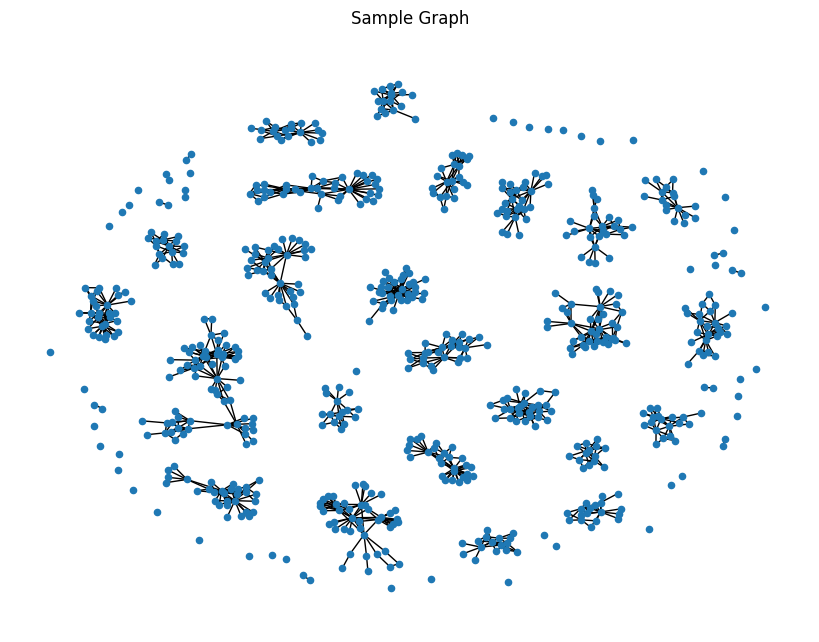

In [24]:
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt
import networkx as nx

data = dataset[0]
G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(8, 6))
nx.draw(G, node_size=20)
plt.title("Sample Graph")
plt.show()


In [50]:
from torch_geometric.utils import train_test_split_edges

def create_masks(data, train_ratio=0.7, val_ratio=0.15):
    num_nodes = data.num_nodes
    indices = torch.randperm(num_nodes)

    train_end = int(train_ratio * num_nodes)
    val_end = train_end + int(val_ratio * num_nodes)

    data.train_mask = torch.zeros(num_nodes, dtype=torch.bool)
    data.val_mask = torch.zeros(num_nodes, dtype=torch.bool)
    data.test_mask = torch.zeros(num_nodes, dtype=torch.bool)

    data.train_mask[indices[:train_end]] = True
    data.val_mask[indices[train_end:val_end]] = True
    data.test_mask[indices[val_end:]] = True
    return data


In [51]:
data = create_masks(dataset[0])


In [56]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=8, dropout=0.6):
        super(GAT, self).__init__()
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        self.conv2 = GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=dropout)
        self.conv3 = GATConv(hidden_channels * heads, hidden_channels, heads=heads, dropout=dropout)
        self.conv4 = GATConv(hidden_channels * heads, out_channels, heads=1, concat = False, dropout=dropout)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.3, training=self.training)
        x = F.elu(self.conv1(x, edge_index))
        x = F.dropout(x, p=0.3, training=self.training)
        x = F.elu(self.conv2(x, edge_index))
        x = F.dropout(x, p=0.3, training=self.training)
        x = self.conv4(x, edge_index)
        return x

In [57]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define in_channels and num_classes
# in_channels for GAT should be the output dimension of the embedding layer
in_channels = 64
num_classes = 25 # Number of unique classes in your labels

# Change model to GAT
model = GAT(in_channels=in_channels, hidden_channels=64, out_channels=num_classes, heads=8).to(device) # Using GAT model
data = data.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=0.01, weight_decay=5e-4)


# Assuming embedding_layer is defined and available from a previous cell (e.g., KqvMh4bpKm7n)

def train():
    model.train()
    optimizer.zero_grad()

    # Apply embedding layer to the node features
    embedded_x = embedding_layer(data.x)

    out = model(embedded_x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()


def test():
    model.eval()
    with torch.no_grad(): # Use no_grad for evaluation
        # Apply embedding layer to the node features
        embedded_x = embedding_layer(data.x)

        out = model(embedded_x, data.edge_index)
        pred = out.argmax(dim=1)

        accs = []
        for mask in [data.train_mask, data.val_mask, data.test_mask]:
            correct = pred[mask].eq(data.y[mask]).sum().item()
            acc = correct / mask.sum().item()
            accs.append(acc)
        return accs  # [train_acc, val_acc, test_acc]

In [58]:
embedding_layer = torch.nn.Linear(data.num_node_features, in_channels).to(device)



In [59]:
for epoch in range(1, 2001):
    loss = train()
    train_acc, val_acc, test_acc = test()
    if epoch % 100 == 0:
        print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}")



Epoch 100, Loss: 2.5472, Train: 0.3089, Val: 0.2762, Test: 0.3458
Epoch 200, Loss: 2.4479, Train: 0.4065, Val: 0.3429, Test: 0.3551
Epoch 300, Loss: 2.3143, Train: 0.3923, Val: 0.3619, Test: 0.3925
Epoch 400, Loss: 2.2087, Train: 0.5203, Val: 0.4667, Test: 0.4299
Epoch 500, Loss: 2.1943, Train: 0.5183, Val: 0.4190, Test: 0.4019
Epoch 600, Loss: 2.2404, Train: 0.4045, Val: 0.2952, Test: 0.3178
Epoch 700, Loss: 2.2386, Train: 0.4797, Val: 0.4476, Test: 0.3458
Epoch 800, Loss: 2.4838, Train: 0.4207, Val: 0.3619, Test: 0.3925
Epoch 900, Loss: 2.3985, Train: 0.5203, Val: 0.4381, Test: 0.4019
Epoch 1000, Loss: 2.4405, Train: 0.5427, Val: 0.4571, Test: 0.4299
Epoch 1100, Loss: 2.4646, Train: 0.5650, Val: 0.4667, Test: 0.4766
Epoch 1200, Loss: 2.4804, Train: 0.5528, Val: 0.4667, Test: 0.3458
Epoch 1300, Loss: 2.1767, Train: 0.5711, Val: 0.4762, Test: 0.4112
Epoch 1400, Loss: 2.3402, Train: 0.5346, Val: 0.4762, Test: 0.4206
Epoch 1500, Loss: 2.2274, Train: 0.5772, Val: 0.5048, Test: 0.4393
Epoc

In [ ]:
print("Unique classes in labels:", data.y.unique())
print("Max label value:", data.y.max().item())


Unique classes in labels: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])
Max label value: 24
